### Common Utilities

In [1]:
import os
# Move up to the parent folder
current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(current_dir, "data", "singapore\\")
print(data_dir)

gym_file = data_dir + "GymsSGGEOJSON_202501.geojson"
hawker_file = data_dir + "HawkerCentresKML_202501.kml"
hdb_file = data_dir + "HDBExistingBuilding_202501.geojson"
master_land_file = data_dir + "MasterPlan2019LandUselayer_202501.geojson"
master_plan_file = data_dir + "MasterPlan2019PlanningAreaBoundaryNoSea_202501.geojson"
map_polygon_file = data_dir + "NationalMapPolygon_202501.kml"
park_file = data_dir + "ParkFacilities_202501.geojson"
preschool_file = data_dir + "PreSchoolsLocation_202501.geojson"
road_file = data_dir + "RoadNetwork_202501.kml"
tourist_file = data_dir + "TouristAttractions_202501.geojson"
pop_file = data_dir + "respopagesextod2024.csv"

c:\Users\meiro\Documents\1_project\trade-area-analysis\data\singapore\


In [2]:
import pandas as pd

def visualize_data(data_path):
    df = pd.read_csv(data_path, header=0)
    df.columns = df.columns.str.lower()
    print(f"there are {len(df)} rows of data")
    display(df.head(5))

    return df

### Extracted UAR Map Polygons - Master Plan 2019 Planning Area Boundary (No Sea)

<p><a alt="download link">https://data.gov.sg/datasets/d_4765db0e87b9c86336792efe8a1f7a66/view</a></p>

<Figure size 2000x1000 with 0 Axes>

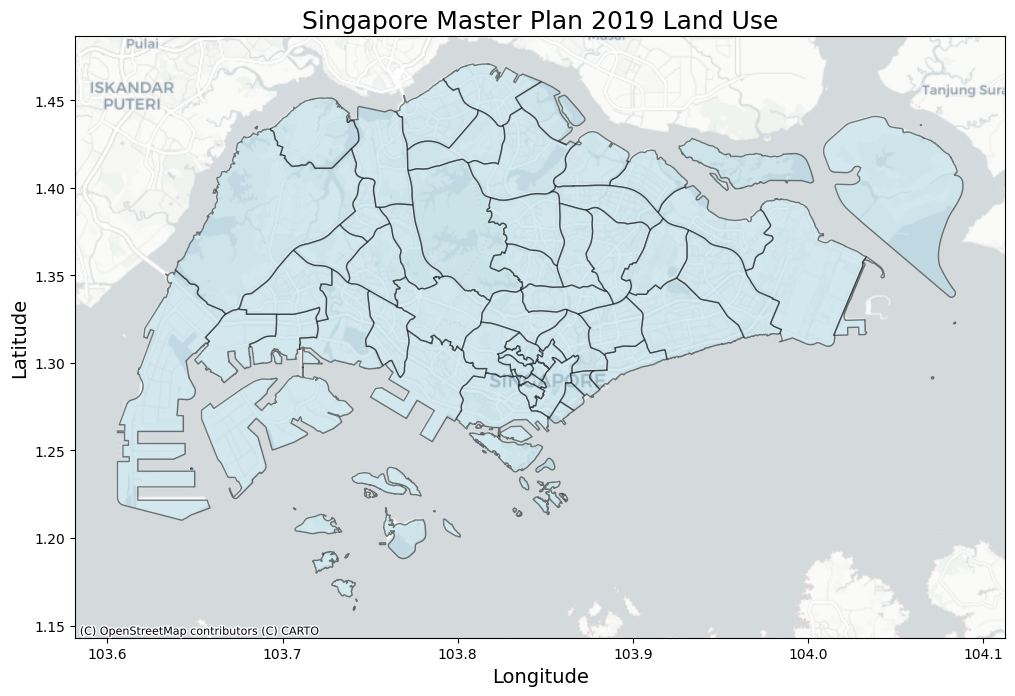

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the GeoJSON file (Master Plan 2019 Land Use layer)
mp2019_data = gpd.read_file(master_plan_file)

# Drop 'name' and 'description' columns if they exist
mp2019_data = mp2019_data.drop(columns=["Name", "Description"], errors='ignore')  # 'errors=ignore' will avoid an error if the column does not exist

# Set figure size for better clarity
plt.figure(figsize=(20, 10))  # Adjust width and height as needed

# Plot the map with contextily basemap
ax = mp2019_data.plot(edgecolor='black', facecolor='lightblue', alpha=0.5, figsize=(12, 12))

# Add basemap (using contextily for background)
ctx.add_basemap(ax, crs=mp2019_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# # Optional: Set the central coordinate for the plot
# central_longitude = 103.8198
# central_latitude = 1.3521
# ax.set_xlim(central_longitude - 0.05, central_longitude + 0.05)  # Adjust as needed for zoom level
# ax.set_ylim(central_latitude - 0.05, central_latitude + 0.05)  # Adjust as needed for zoom level

# Title and labels
plt.title("Singapore Master Plan 2019 Land Use", fontsize=18)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Show the plot
plt.show()


plot map with label

In [4]:
import re
import json
import csv

# Load the geoJSON data
with open(master_plan_file) as f:
    geojson_data = json.load(f)

# Extract column names dynamically from the Description field
description_sample = geojson_data["features"][0]["properties"]["Description"]
columns = re.findall(r"<th>(.*?)<\/th>", description_sample)

# Prepare the CSV data
csv_data = []
for feature in geojson_data["features"]:
    properties = feature["properties"]
    description = properties.get("Description", "")
    
    # Extract values dynamically for each column
    values = re.findall(r"<td>(.*?)<\/td>", description)
    
    # Fill missing columns with empty strings if there are fewer values than columns
    values.extend([""] * (len(columns) - len(values)))
    
    row = dict(zip(columns, values))
    
    # Add geometry coordinates (longitude, latitude)
    row["coordinates"] =  feature["geometry"]["coordinates"]
    # # Handle cases where coordinates are multi-dimensional (e.g., MultiPolygon)
    # if len(coords) > 0 and len(coords[0]) > 0:
    #     row["lon"] = coords[0][0][0]  # Assuming the first coordinate is longitude
    #     row["lat"] = coords[0][0][1]  # Assuming the second coordinate is latitude
    
    csv_data.append(row)

# # coordinates too long, need to manipulated to be stored to different cells 
# # Write to a CSV file
# planningarea_csv = data_dir + "planning_area_202501.csv"
# with open(planningarea_csv, mode="w", newline="", encoding="utf-8") as file:
#     writer = csv.DictWriter(file, fieldnames=columns + ["lon", "lat"])
#     writer.writeheader()
#     writer.writerows(csv_data)

# print(f"data extracted to folder")

df_pa = pd.DataFrame(csv_data)
df_pa.columns = df_pa.columns.str.lower()
df_pa["name"] = df_pa["pln_area_n"]
display(df_pa.head(5))

pln_area_n pln_area_c ca_ind        region_n region_c           inc_crc  \
0          BEDOK         BD      N     EAST REGION       ER  5F00E6FF084F3364   
1       BOON LAY         BL      N     WEST REGION       WR  C96AED188C00B2FC   
2    BUKIT BATOK         BK      N     WEST REGION       WR  3BEC4C829160F28A   
3    BUKIT MERAH         BM      N  CENTRAL REGION       CR  4850795BB0B6A4F7   
4  BUKIT PANJANG         BP      N     WEST REGION       WR  656F87D23D6DAB02   

       fmel_upd_d                                        coordinates  \
0  20191223152014  [[[103.932080144934, 1.3055476965106, 0.0], [1...   
1  20191223152014  [[[103.720424356295, 1.32823958886107, 0.0], [...   
2  20191223152014  [[[103.764078848716, 1.37001140859472, 0.0], [...   
3  20191223152014  [[[103.823614644329, 1.26017768291763, 0.0], [...   
4  20191223152014  [[[103.774450261573, 1.39028945327265, 0.0], [...   

            name  
0          BEDOK  
1       BOON LAY  
2    BUKIT BATOK  
3    BUKIT MERAH  
4  BUKIT PANJANG

In [5]:
import geopandas as gpd
import re
import pandas as pd

# Extract name from description
def extract_name_and_folder_path(description):
    # Regular expression pattern to extract pattern
    name_pattern = r"<th>PLN_AREA_N<\/th>\s*<td>(.*?)<\/td>"  
    region_pattern = r"<th>REGION_N<\/th>\s*<td>(.*?)<\/td>"  

    # Extract the name using the pattern
    name_match = re.search(name_pattern, description)
    name = name_match.group(1).lower() if name_match else None

    # Extract the folder path using the pattern
    region_match = re.search(region_pattern, description)
    region = region_match.group(1).lower() if region_match else None

    return name, region

# Load the GeoJSON file (Master Plan 2019 Land Use layer)
gdf = gpd.read_file(master_plan_file)
gdf.columns = gdf.columns.str.lower()

# Apply the function to each row in the 'description' column and create new columns for 'name' and 'folder_path'
gdf[["name", "region"]] = gdf["description"].apply(lambda x: pd.Series(extract_name_and_folder_path(x)))
display(gdf.head())

name                                        description  \
0          bedok  <center><table><tr><th colspan='2' align='cent...   
1       boon lay  <center><table><tr><th colspan='2' align='cent...   
2    bukit batok  <center><table><tr><th colspan='2' align='cent...   
3    bukit merah  <center><table><tr><th colspan='2' align='cent...   
4  bukit panjang  <center><table><tr><th colspan='2' align='cent...   

                                            geometry          region  
0  POLYGON Z ((103.93208 1.30555 0, 103.93208 1.3...     east region  
1  POLYGON Z ((103.72042 1.32824 0, 103.72003 1.3...     west region  
2  POLYGON Z ((103.76408 1.37001 0, 103.76444 1.3...     west region  
3  POLYGON Z ((103.82361 1.26018 0, 103.82362 1.2...  central region  
4  POLYGON Z ((103.77445 1.39029 0, 103.77499 1.3...     west region

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

def plot_features_with_label(gdf, feature, fig_height=10, fig_width=10, font_size=6):
    # Filter the GeoDataFrame based on the feature input
    if feature:
        pattern = '|'.join(feature)
        filtered_gdf = gdf[gdf["name"].str.contains(pattern, case=False, na=False)]
    else:
        filtered_gdf = gdf
    display(filtered_gdf.head(5))

    # Set up the plot
    fig, ax = plt.subplots(figsize=(fig_height, fig_width))

    # Plot the filtered GeoDataFrame (polygons)
    filtered_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.7)

    # Add labels
    for idx, row in filtered_gdf.iterrows():
        # Get the centroid coordinates and label
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        label = row["name"]

        # Adjust text placement slightly to avoid overlap
        ax.text(x, y, label, fontsize=font_size, ha="center", color="red", 
                verticalalignment='center', horizontalalignment='center')

    # Optionally, add a basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    # Set plot title and labels
    title = "map"
    if feature:
        title = ' '.join(feature)
    ax.set_title(f"Singapore {title} with Labels", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)

    # Show the plot
    plt.show()


name                                        description  \
0          bedok  <center><table><tr><th colspan='2' align='cent...   
1       boon lay  <center><table><tr><th colspan='2' align='cent...   
2    bukit batok  <center><table><tr><th colspan='2' align='cent...   
3    bukit merah  <center><table><tr><th colspan='2' align='cent...   
4  bukit panjang  <center><table><tr><th colspan='2' align='cent...   

                                            geometry          region  
0  POLYGON Z ((103.93208 1.30555 0, 103.93208 1.3...     east region  
1  POLYGON Z ((103.72042 1.32824 0, 103.72003 1.3...     west region  
2  POLYGON Z ((103.76408 1.37001 0, 103.76444 1.3...     west region  
3  POLYGON Z ((103.82361 1.26018 0, 103.82362 1.2...  central region  
4  POLYGON Z ((103.77445 1.39029 0, 103.77499 1.3...     west region

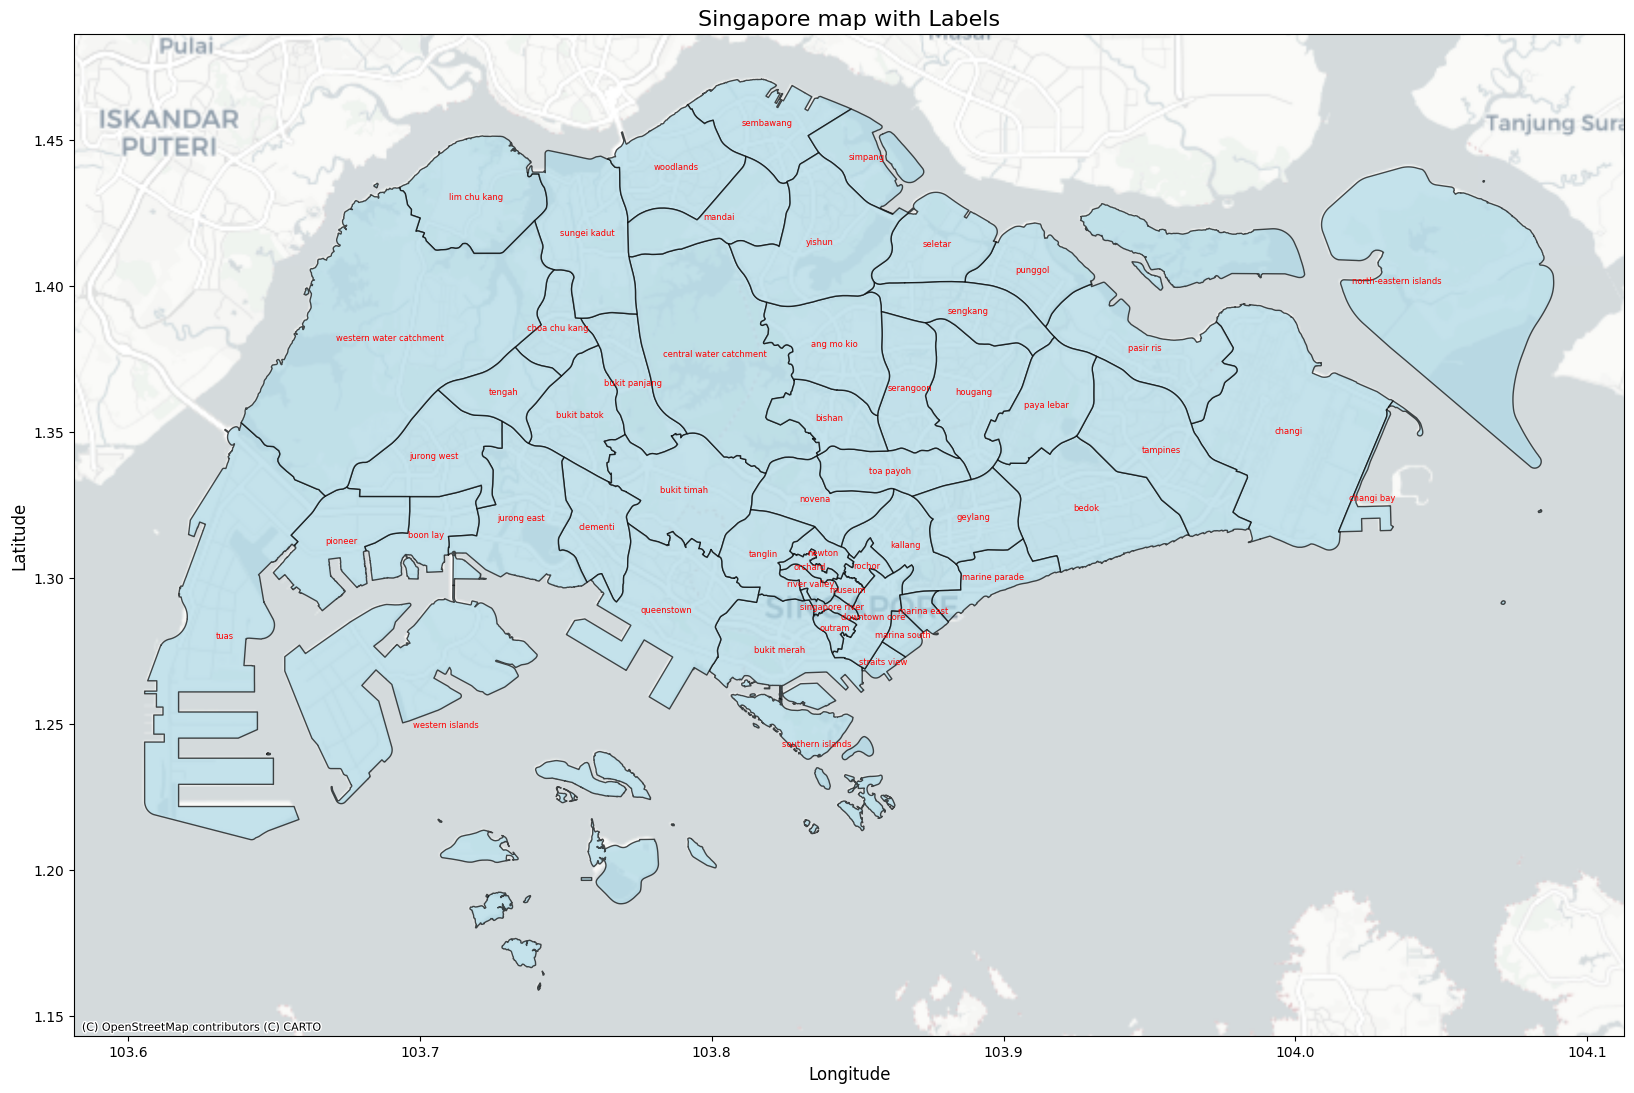

In [7]:
plot_features_with_label(gdf, [], 20, 20, 6)

### Plot Orchard Gym Data 

In [8]:
import geopandas as gpd
import re
import pandas as pd

# Extract name from description
def extract_name_and_folder_path(description):
    # Regular expression pattern to extract pattern
    name_pattern = r"<th>PLN_AREA_N<\/th>\s*<td>(.*?)<\/td>"  
    region_pattern = r"<th>REGION_N<\/th>\s*<td>(.*?)<\/td>"  

    # Extract the name using the pattern
    name_match = re.search(name_pattern, description)
    name = name_match.group(1).lower() if name_match else None

    # Extract the folder path using the pattern
    region_match = re.search(region_pattern, description)
    region = region_match.group(1).lower() if region_match else None

    return name, region

# Load the GeoJSON file (Master Plan 2019 Land Use layer)
gdf_land = gpd.read_file(master_plan_file)
gdf_land.columns = gdf_land.columns.str.lower()

# Apply the function to each row in the 'description' column and create new columns for 'name' and 'folder_path'
gdf_land[["name", "region"]] = gdf_land["description"].apply(lambda x: pd.Series(extract_name_and_folder_path(x)))
gdf_orchard = gdf_land[gdf_land["name"].isin(["orchard"])]
display(gdf_orchard)

name                                        description  \
44  orchard  <center><table><tr><th colspan='2' align='cent...   

                                             geometry          region  
44  POLYGON Z ((103.83533 1.30806 0, 103.83538 1.3...  central region

In [9]:
import pandas as pd
import geopandas as gpd
import re

def extract_attributes_from_description(description):
    """
    Extract key-value pairs from the HTML-like table in the 'description' column.
    """
    if pd.isna(description):
        return {}

    # Use regex to extract table rows (<th> and <td>)
    matches = re.findall(r"<th>(.*?)<\/th>\s*<td>(.*?)<\/td>", description)
    attributes = {key.strip(): value.strip() for key, value in matches}
    return attributes

def extract_attributes_to_dataframe(gdf, description_column="description"):
    """
    Extract attributes from the 'description' column and add them as new columns.
    """
    # Apply the extraction function to the description column
    extracted_data = gdf[description_column].apply(extract_attributes_from_description)
    
    # Convert the list of dictionaries into a DataFrame
    attributes_df = pd.DataFrame(extracted_data.tolist())
    
    # Merge the attributes DataFrame back with the original GeoDataFrame
    result_gdf = gdf.join(attributes_df)
    return result_gdf

# Example usage
# Assuming 'gdf' is your GeoDataFrame and contains a 'description' column
gdf = gpd.read_file(gym_file)  # Replace with your file path
gdf.columns = gdf.columns.str.lower()
gdf_gym = extract_attributes_to_dataframe(gdf)
# Drop the first 'name' column using its position
gdf_gym.columns = gdf_gym.columns.str.lower()
gdf_gym = gdf_gym.iloc[:, 1:]
# Display the first few rows of the updated GeoDataFrame
print(f"there are {len(gdf_gym)} gyms")
display(gdf_gym.head(1))

# 

there are 159 gyms


description  \
0  <center><table><tr><th colspan='2' align='cent...   

                       geometry landyaddresspoint landxaddresspoint  \
0  POINT Z (103.8442 1.27811 0)                 0                 0   

  addresspostalcode addressbuildingname hyperlink photourl addressunitnumber  \
0             78989                                                            

  addressfloornumber addressstreetname addressblockhousenumber  \
0                          Tras Street                      50   

                         description           inc_crc      fmel_upd_d  \
0  Operating Hours: 7.00am - 10.00am  0E28997B4498C8C3  20160127095840   

      name  
0  The Pit

In [10]:
import geopandas as gpd

def find_gyms_within_area(gdf_area, gdf_points):
    """
    Find all points (e.g., gyms) within a specific area (e.g., Orchard).
    
    Parameters:
        gdf_area (GeoDataFrame): GeoDataFrame containing polygon geometry for the area.
        gdf_points (GeoDataFrame): GeoDataFrame containing point geometry for the gyms.
    
    Returns:
        GeoDataFrame: Points that are within the area.
    """
    # Ensure both GeoDataFrames have the same CRS
    if gdf_area.crs != gdf_points.crs:
        gdf_points = gdf_points.to_crs(gdf_area.crs)
    
    # Perform spatial join to find points within the area
    result = gpd.sjoin(gdf_points, gdf_area, predicate="within")
    return result

# Assuming gdf_orchard contains the Orchard polygon and gdf_gym contains the gym points
gyms_within_orchard = find_gyms_within_area(gdf_orchard, gdf_gym)
# Drop the first 'name_left' column using its position
gyms_within_orchard = gyms_within_orchard.rename(columns={"name_left": "name"})

# Display the gyms within Orchard
print(f"there are {len(gyms_within_orchard)} gyms in planning area orchard")
display(gyms_within_orchard[["name", "geometry", "addressstreetname", "name_right"]])


there are 16 gyms in planning area orchard


name  \
9                                   Zattva Yoga Studio   
11                             Fitness First - Paragon   
30          Pure Fitness - Knightsbridge (Asia Square)   
33                                            iPilates   
34         California Fitness - Orchard- Ngee Ann City   
36                                         Sky Pilates   
38   Core Fitness Physiotherapy & Pilates Centre  -...   
42                                    Elements Pilates   
82                           Total Yoga - Orchard Road   
88                           True Yoga - Pacific Plaza   
107                          Pure Yoga - Ngee Ann City   
108                                          Real Yoga   
115                                 The Gym At Orchard   
134                        COMO Shambhala Urban Escape   
136                            Focus Pilates - Orchard   
155                                 Active Life Center   

                          geometry  addressstreetname name_right  
9    POINT Z (103.84115 1.30126 0)       Orchard Road    orchard  
11   POINT Z (103.83524 1.30372 0)                       orchard  
30    POINT Z (103.8362 1.30311 0)        Marina View    orchard  
33   POINT Z (103.83204 1.30763 0)      Claymore Hill    orchard  
34   POINT Z (103.83468 1.30242 0)      Ngee Ann City    orchard  
36   POINT Z (103.83072 1.30509 0)       Orchard Road    orchard  
38    POINT Z (103.82851 1.3062 0)       Orchard Road    orchard  
42   POINT Z (103.82508 1.30527 0)       Tanglin Road    orchard  
82   POINT Z (103.83204 1.30763 0)      Claymore Hill    orchard  
88   POINT Z (103.83213 1.30654 0)        Scotts Road    orchard  
107  POINT Z (103.83468 1.30242 0)  391A Orchard Road    orchard  
108  POINT Z (103.83976 1.30198 0)       Orchard Road    orchard  
115  POINT Z (103.82998 1.30551 0)       Orchard Road    orchard  
134  POINT Z (103.82847 1.30718 0)                       orchard  
136  POINT Z (103.83483 1.30395 0)       Orchard Road    orchard  
155  POINT Z (103.82998 1.30551 0)       Orchard Road    orchard

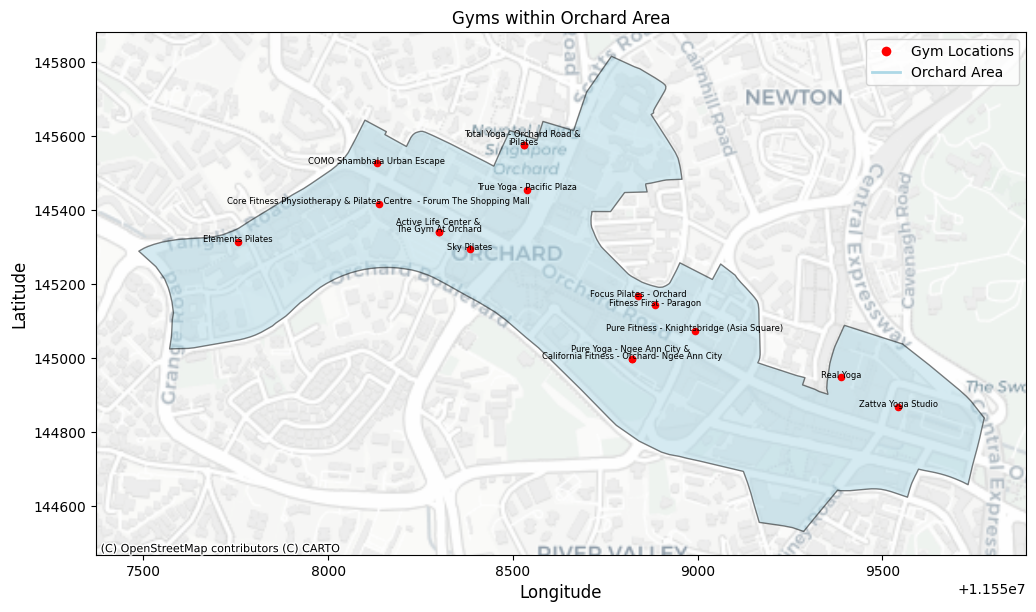

In [11]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_point_with_polygon(area_gdf, point_gdf):
    """
    Plot gyms within an area on an underlying basemap.
    
    Parameters:
        area_gdf (GeoDataFrame): GeoDataFrame containing the area (polygon) geometry.
        point_gdf (GeoDataFrame): GeoDataFrame containing the locations (points).
    """
    # Ensure the GeoDataFrames have the same CRS
    if area_gdf.crs != point_gdf.crs:
        point_gdf = point_gdf.to_crs(area_gdf.crs)
    
    # Reproject to Web Mercator (EPSG:3857) for compatibility with basemap
    area_gdf = area_gdf.to_crs(epsg=3857)
    point_gdf = point_gdf.to_crs(epsg=3857)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot the Orchard area polygon
    area_plot = area_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="Orchard Area")
    
    # # Adjust duplicate points by adding a small offset
    # shifted_points = set()
    # point_adjustment = 5  # Offset in map units (meters for EPSG:3857)

    # adjusted_geometries = []
    # for geom in point_gdf.geometry:
    #     while (geom.x, geom.y) in shifted_points:  # If point overlaps, adjust it
    #         geom = Point(geom.x + point_adjustment, geom.y + point_adjustment)
    #     shifted_points.add((geom.x, geom.y))
    #     adjusted_geometries.append(geom)
    
    # # Update point_gdf geometry with adjusted points
    # point_gdf["geometry"] = adjusted_geometries
    
    # Plot the adjusted gym locations
    point_gdf.plot(ax=ax, color="red", markersize=20, label="Gym Locations")
    
    # Add labels with a manual line break (e.g., splitting into two rows)
    label_y_positions = {}  # Dictionary to track y-positions of labels
    
    for x, y, label in zip(point_gdf.geometry.centroid.x, point_gdf.geometry.centroid.y, point_gdf["name"]):
        # # If the label is too long, split it into two lines
        # if len(label) > 16:  # Change 16 to whatever length fits your needs
        #     label = label[:len(label)//2] + "\n" + label[len(label)//2:]
        
        # Check for overlapping labels and adjust position if needed
        # Find the previous label's y-position and adjust if necessary
        if y in label_y_positions:
            label = label + " & "
            label_y_positions[y] += 20 # Slight adjustment to avoid overlap
        else:
            label_y_positions[y] = y
        
        # Plot the label with adjusted y-coordinate
        ax.text(x, label_y_positions[y], label, fontsize=6, ha="center", color="black")
    
    # Add a basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # Customize the plot
    ax.set_title("Gyms within Orchard Area", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    
    # Manually create legend handles
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Gym Locations'),
        Line2D([0], [0], color='lightblue', lw=2, label='Orchard Area')
    ]
    
    # Add the custom legend
    ax.legend(handles=legend_handles, loc='upper right')
    
    # Show the plot
    plt.show()

# Example function call
plot_point_with_polygon(gdf_orchard, gyms_within_orchard)


#### Create a 500m buffer / trade area from a gym called "Elements Pilates"

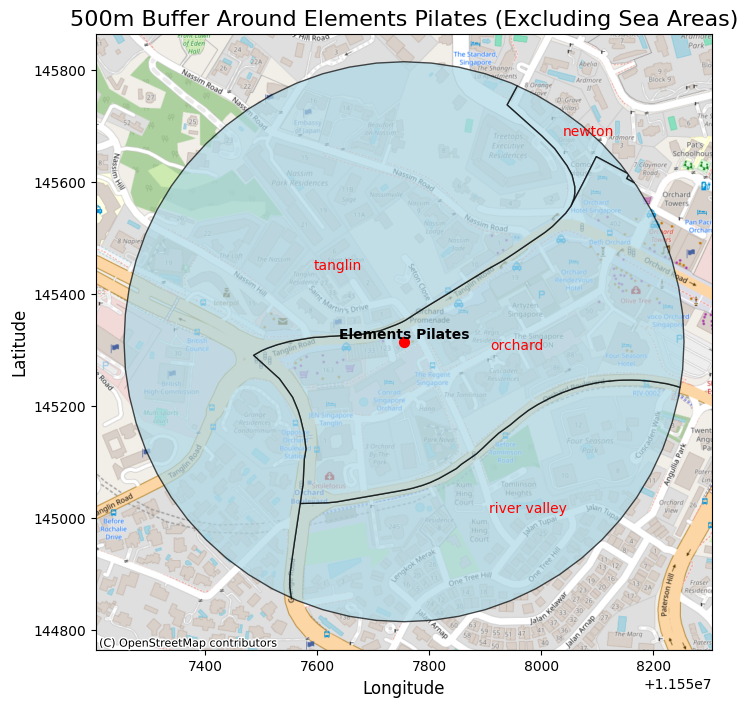

In [12]:
# Create a 500 meter buffer around the gym location
ep_gym = gdf_gym[gdf_gym["name"].isin(["Elements Pilates"])]
ep_gym = ep_gym.to_crs(epsg=3857)  # Web Mercator projection (meters)
gdf_buffer = ep_gym.geometry.buffer(500)  # Buffer of 500 meters

# Convert to the local projection (meters) for buffer calculation
gdf_land = gdf_land.to_crs(epsg=3857)  # Reproject land data to same CRS

# Create a 500 meter buffer around the gym location
buffer_500m = ep_gym.geometry.buffer(500)  # Buffer of 500 meters

# Convert buffer to GeoDataFrame
gdf_buffer = gpd.GeoDataFrame({'geometry': buffer_500m}, crs=ep_gym.crs)

# Remove the area that intersects with the sea (land areas only)
# Use the intersection of the buffer and the land
gdf_buffer = gpd.overlay(gdf_buffer, gdf_land, how='intersection')

# Plot the result
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the land and the buffer
gdf_buffer.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.7)

# Add labels with a manual line break (e.g., splitting into two rows)
for x, y, label in zip(gdf_buffer.geometry.centroid.x, gdf_buffer.geometry.centroid.y, gdf_buffer["name"]):
    # If the label is too long, split it into two lines
    if len(label) > 16:  # Change 10 to whatever length fits your needs
        label = label[:len(label)//2] + "\n" + label[len(label)//2:]
    ax.text(x, y, label, fontsize=10, ha="left", color="red")

# Plot the gym within the buffer
ep_gym.plot(ax=ax, color="red", markersize=50, alpha=1.0, label="Elements Pilates")

# Add label to the gym point
for x, y in zip(ep_gym.geometry.x, ep_gym.geometry.y):
    ax.text(x, y, "Elements Pilates", fontsize=10, ha="center", color="black", fontweight="bold", verticalalignment="bottom")

# Optionally, add a basemap using contextily
ctx.add_basemap(ax, crs=gdf_buffer.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Set title and labels
ax.set_title("500m Buffer Around Elements Pilates (Excluding Sea Areas)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()


In [13]:
# Calculate sub_area over total_area in a buffer
# Calculate the total area of the buffer (in square meters, for example)
gdf_buffer["total_area"] = gdf_buffer.geometry.area.sum()

# Calculate the area of each individual polygon in buffer_df
gdf_buffer['sub_area'] = gdf_buffer.geometry.area

# Calculate the percentage of the total area that each polygon occupies
gdf_buffer['sub_over_total_area'] = (gdf_buffer['sub_area'] / gdf_buffer['total_area']) * 100

# Display the updated DataFrame
display(gdf_buffer[["name", "total_area", "sub_area", "sub_over_total_area"]].head(5))  # Adjust column names as needed


name     total_area       sub_area  sub_over_total_area
0  river valley  784137.122637  168497.424925            21.488260
1        newton  784137.122637   12422.716920             1.584253
2       orchard  784137.122637  216974.337961            27.670459
3       tanglin  784137.122637  386242.642831            49.257028

#### Caculate the number of residents by trade area

<a alt="link to download 2024 population data">https://www.singstat.gov.sg/find-data/search-by-theme/population/geographic-distribution/latest-data </a>

In [14]:
# Load planning area
gdf_land = gdf_land.to_crs(epsg=4326)

# Load population dat
# some data has to be cross-validated, for example boon lay, pop = 0?
df_pop = (
    pd.read_csv(pop_file, header=0)
    .groupby("PA", as_index=False)["Pop"].sum()
    .rename(columns=str.lower)
    .assign(pa=lambda df: df["pa"].str.lower())
)

# Perform data join
gdf_land_pop = gdf_land.merge(df_pop, left_on="name", right_on="pa", how="left")

print(f"total residents = {df_pop['pop'].sum()}")
display(gdf_land_pop.head(10))

total residents = 4189460


name                                        description  \
0                    bedok  <center><table><tr><th colspan='2' align='cent...   
1                 boon lay  <center><table><tr><th colspan='2' align='cent...   
2              bukit batok  <center><table><tr><th colspan='2' align='cent...   
3              bukit merah  <center><table><tr><th colspan='2' align='cent...   
4            bukit panjang  <center><table><tr><th colspan='2' align='cent...   
5              bukit timah  <center><table><tr><th colspan='2' align='cent...   
6  central water catchment  <center><table><tr><th colspan='2' align='cent...   
7                   changi  <center><table><tr><th colspan='2' align='cent...   
8            choa chu kang  <center><table><tr><th colspan='2' align='cent...   
9                 clementi  <center><table><tr><th colspan='2' align='cent...   

                                            geometry          region  \
0  POLYGON Z ((103.93208 1.30555 0, 103.93208 1.3...     east region   
1  POLYGON Z ((103.72042 1.32824 0, 103.72003 1.3...     west region   
2  POLYGON Z ((103.76408 1.37001 0, 103.76444 1.3...     west region   
3  POLYGON Z ((103.82361 1.26018 0, 103.82362 1.2...  central region   
4  POLYGON Z ((103.77445 1.39029 0, 103.77499 1.3...     west region   
5  POLYGON Z ((103.79766 1.34813 0, 103.79806 1.3...  central region   
6  POLYGON Z ((103.80702 1.41126 0, 103.80754 1.4...    north region   
7  POLYGON Z ((103.98236 1.39356 0, 103.98242 1.3...     east region   
8  POLYGON Z ((103.7466 1.40541 0, 103.74691 1.40...     west region   
9  POLYGON Z ((103.76707 1.3312 0, 103.76708 1.33...     west region   

                        pa     pop  
0                    bedok  277290  
1                 boon lay       0  
2              bukit batok  168430  
3              bukit merah  148940  
4            bukit panjang  138440  
5              bukit timah   83860  
6  central water catchment       0  
7                   changi    1920  
8            choa chu kang  190540  
9                 clementi  102620

In [15]:
# Extract relevant columns for trade area
ta_ep = gdf_buffer[["name", "total_area", "sub_area", "sub_over_total_area"]]

# Merge with population data
ta_ep = ta_ep.merge(gdf_land_pop, left_on="name", right_on="pa", how="left")

# Select relevant columns (make sure 'name_x' is correct, check column names after merge)
ta_ep_pop = ta_ep[["name_x", "geometry", "total_area", "sub_area", "sub_over_total_area", "pop", "region"]]

# Add new column for population in the sub-area
ta_ep_pop = ta_ep_pop.copy()
ta_ep_pop.loc[:, "sub_pop"] = (ta_ep_pop["sub_over_total_area"] / 100) * ta_ep_pop["pop"]

# Display the results
print(f"the estimated residents in the trade area of Elements Pilates = {ta_ep_pop['sub_pop'].sum().round(0)}")
display(ta_ep_pop.head(5))



the estimated residents in the trade area of Elements Pilates = 14943.0


name_x                                           geometry  \
0  river valley  POLYGON Z ((103.83059 1.304 0, 103.83074 1.303...   
1        newton  POLYGON Z ((103.84577 1.30984 0, 103.84686 1.3...   
2       orchard  POLYGON Z ((103.83533 1.30806 0, 103.83538 1.3...   
3       tanglin  POLYGON Z ((103.82761 1.30727 0, 103.82746 1.3...   

      total_area       sub_area  sub_over_total_area    pop          region  \
0  784137.122637  168497.424925            21.488260  11830  central region   
1  784137.122637   12422.716920             1.584253   9690  central region   
2  784137.122637  216974.337961            27.670459   1290  central region   
3  784137.122637  386242.642831            49.257028  24140  central region   

        sub_pop  
0   2542.061177  
1    153.514128  
2    356.948916  
3  11890.646583

#### Perform cannibalization analysis

In [16]:
# Check which points in gdf_gym are within any of the polygons in gdf_buffer
gdf_buffer = gdf_buffer.to_crs(epsg=4326)
gdf_gym["within_buffer"] = gdf_gym.geometry.apply(lambda point: any(gdf_buffer.geometry.contains(point)))
filter_gdf_gym = gdf_gym[gdf_gym["within_buffer"] == True]
filter_gdf_gym = filter_gdf_gym[~ (filter_gdf_gym["name"] == "Elements Pilates") ]

# Display the results
print(f"there are {len(filter_gdf_gym )} gyms within the trade area of elements pilates")
display(filter_gdf_gym[["name", "geometry"]] )


there are 4 gyms within the trade area of elements pilates


name  \
38   Core Fitness Physiotherapy & Pilates Centre  -...   
114                                        Spaboutique   
123                            YogaDivas - Leonie Hill   
134                        COMO Shambhala Urban Escape   

                          geometry  
38    POINT Z (103.82851 1.3062 0)  
114  POINT Z (103.82593 1.30779 0)  
123  POINT Z (103.82593 1.30779 0)  
134  POINT Z (103.82847 1.30718 0)

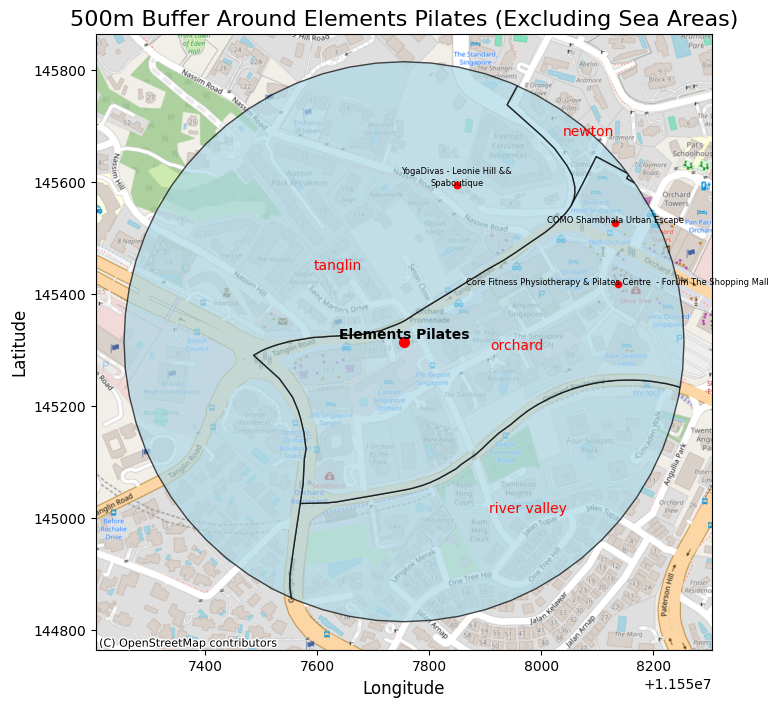

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convert projection
gdf_buffer = gdf_buffer.to_crs(epsg=3857)
filter_gdf_gym= filter_gdf_gym.to_crs(epsg=3857)

# Plot the result
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the land and the buffer
gdf_buffer.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.7)

# Add labels with a manual line break (e.g., splitting into two rows)
for x, y, label in zip(gdf_buffer.geometry.centroid.x, gdf_buffer.geometry.centroid.y, gdf_buffer["name"]):
    # If the label is too long, split it into two lines
    # if len(label) > 16:  # Change 16 to whatever length fits your needs
    #     label = label[:len(label)//2] + "\n" + label[len(label)//2:]
    ax.text(x, y, label, fontsize=10, ha="left", color="red")

# Plot the gym within the buffer
filter_gdf_gym.plot(ax=ax, color="red", markersize=20, alpha=1.0, label="Gym Locations")

# Add labels with a manual line break (e.g., splitting into two rows)
label_y_positions = {}  # Dictionary to track y-positions of labels

for x, y, label in zip(filter_gdf_gym.geometry.centroid.x, filter_gdf_gym.geometry.centroid.y, filter_gdf_gym["name"]):
    # Check for overlapping labels and adjust position if needed
    if y in label_y_positions:
        label_y_positions[y] += 20  # Slight adjustment to avoid overlap
        label = label + " && "
    else:
        label_y_positions[y] = y
    # Plot the label with adjusted y-coordinate
    ax.text(x, label_y_positions[y], label, fontsize=6, ha="center", color="black")


# Plot the gym within the buffer
ep_gym.plot(ax=ax, color="red", markersize=50, alpha=1.0, label="Elements Pilates")

# Add label to the gym point
for x, y in zip(ep_gym.geometry.x, ep_gym.geometry.y):
    ax.text(x, y, "Elements Pilates", fontsize=10, ha="center", color="black", fontweight="bold", verticalalignment="bottom")

# Optionally, add a basemap using contextily
ctx.add_basemap(ax, crs=gdf_buffer.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Set title and labels
ax.set_title("500m Buffer Around Elements Pilates (Excluding Sea Areas)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()


In [18]:
""" Calculate impact """
import numpy as np

# Ensure both GeoDataFrames are in the same CRS (Web Mercator)
filter_gdf_gym = filter_gdf_gym.to_crs(epsg=3857)  # Reproject gym data to Web Mercator CRS
ep_gym = ep_gym.to_crs(epsg=3857)  # Reproject gym location to Web Mercator CRS

# Get the geometry (location) of the gym in ep_gym
gym_point = ep_gym.geometry.iloc[0]  # Assuming there's only one gym in ep_gym

# Initialize an empty dictionary to store the distances
distance_dict = {}

# Calculate the distance between the gym point and each point in filter_gdf_gym
for idx, row in filter_gdf_gym.iterrows():
    # Calculate the distance between the gym and the current point in filter_gdf_gym
    distance = gym_point.distance(row.geometry)
    
    # Store the distance in the dictionary with the name as the key
    distance_dict[row["name"]] = distance

# Display the dictionary with the distances
print(distance_dict)

# Function to adjust the impact based on distance (inverse distance decay)
def calculate_impact(distance, decay_exponent=1.5, default_score=100):
    return default_score / (distance ** decay_exponent)

# Dictionary to store adjusted scores
adjusted_scores = {}

# Calculate the adjusted impact for each competitor
for competitor, distance in distance_dict.items():
    adjusted_score = calculate_impact(distance)
    adjusted_scores[competitor] = adjusted_score

# Display the adjusted scores
print("------------------")
print("Adjusted Impact Scores:")
for competitor, adjusted_score in adjusted_scores.items():
    print(f"{competitor} : {adjusted_score:.2f}")

# Calculate the total impact (sum of all adjusted scores)
total_impact = sum(adjusted_scores.values())
print("------------------")
print(f"\nTotal Impact: {total_impact:.2f}")

{'Core Fitness Physiotherapy & Pilates Centre  - Forum The Shopping Mall': 395.4478958200866, 'Spaboutique': 295.5714932147767, 'YogaDivas - Leonie Hill': 295.5714932147767, 'COMO Shambhala Urban Escape': 432.93406710315804}
------------------
Adjusted Impact Scores:
Core Fitness Physiotherapy & Pilates Centre  - Forum The Shopping Mall : 0.01
Spaboutique : 0.02
YogaDivas - Leonie Hill : 0.02
COMO Shambhala Urban Escape : 0.01
------------------

Total Impact: 0.06


### Perform Massive Parallel Procesing

### Extract SLA Map Polygon: coastal outlines, recreational and hydrographic features

In [19]:
# Convert kml file to csv
import xml.etree.ElementTree as ET
import csv

# Parse the KML file
tree = ET.parse(map_polygon_file)
root = tree.getroot()

# Namespace mapping
ns = {
    "kml": "http://www.opengis.net/kml/2.2",
    "gx": "http://www.google.com/kml/ext/2.2",
}

# Extract Placemark data for the road network
csv_data = []
for placemark in root.findall(".//kml:Placemark", ns):
    placemark_data = {}
    
    # Extract the attributes (NAME, FOLDERPATH, etc.)
    extended_data = placemark.find(".//kml:ExtendedData/kml:SchemaData", ns) 
    if extended_data is not None:
        for simple_data in extended_data.findall(".//kml:SimpleData", ns):
            key = simple_data.get("name")
            value = simple_data.text
            placemark_data[key] = value
    
    # Extract the coordinates
    coordinates = placemark.find(".//kml:coordinates", ns)
    if coordinates is not None:
        placemark_data["geometry"] = coordinates.text.strip().replace("\n", " ").replace("\r", " ").replace('"', '""')
    
    csv_data.append(placemark_data)

# # Write extracted data to CSV
# csv_columns = set().union(*(d.keys() for d in csv_data))
# map_csv = data_dir + "map_polygon_202501.csv"
# with open(map_csv, mode="w", newline="", encoding="utf-8") as file:
#     writer = csv.DictWriter(file, fieldnames=csv_columns)
#     writer.writeheader()
#     writer.writerows(csv_data)

# print("data extracted to data folder")

# df_map = visualize_data(map_csv)
df_map = pd.DataFrame(csv_data)
df_map.head(5)

NAME           FOLDERPATH SYMBOLID           INC_CRC  \
0  SUNGEI KETAPANG  Layers/Hydrographic        4  26B5B7EC4633DE8B   
1             POND  Layers/Hydrographic        4  7F33336D573646A9   
2     SUNGEI BEDOK  Layers/Hydrographic        4  53B22D7F36B804E8   
3             POND  Layers/Hydrographic        4  E23B11191EE75B69   
4     SUNGEI BEDOK  Layers/Hydrographic        4  923CFEAAA00266B6   

       FMEL_UPD_D                                           geometry  
0  20191008154614  103.956411510644,1.3313555849612,0.0 103.95648...  
1  20191008154614  103.957454966314,1.31878704975872,0.0 103.9572...  
2  20191008154614  103.960682455874,1.32115972827619,0.0 103.9622...  
3  20191008154614  103.962654805601,1.32080240444442,0.0 103.9626...  
4  20191008154614  103.962825103758,1.31628973774835,0.0 103.9634...

In [20]:
import pandas as pd

# Convert column names to lowercase (you shouldn't overwrite the whole DataFrame)
df_map.columns = df_map.columns.str.lower()

# Get unique names from the 'name' column and remove NaN values
polygon_types = df_map["name"].dropna().unique()

# Sort the unique names in ascending order
sorted_polygon_types = sorted(polygon_types)

# Print the number of unique names and the names themselves
print(f"The number of unique names = {len(sorted_polygon_types)}")
print(f"Unique names: {sorted_polygon_types}")

# Save the sorted unique names to a CSV file
sorted_df = pd.DataFrame(sorted_polygon_types, columns=["Polygon Name"])
sorted_df.to_csv(data_dir + "sorted_polygon_names.csv", index=False)

print("Sorted names have been saved to 'sorted_polygon_names.csv'")

display(sorted_df)

The number of unique names = 203
Unique names: ['104° 20’ 00” E', '104° 40’ 00” E', '1° 14’ 30” N', '1° 29’ 30” N', 'ABC WATERS @ KALLANG RIVER', 'ADMIRALTY PARK', 'ALEXANDRA CANAL', 'ANG MO KIO TOWN GARDEN WEST', 'BALAI QUARRY', 'BATU BELALAI', 'BEDOK RESERVOIR', 'BEDOK RESERVOIR PARK', 'BISHAN - ANG MO KIO PARK', 'BUKIT BATOK NATURE PARK', 'BUKIT BATOK TOWN PARK', 'BUKIT TIMAH NATURE RESERVE', 'BUKIT TIMAH SECOND DIVERSION CANAL', 'CANAL', 'CAUSEWAY (JOHOR)', 'CAUSEWAY (SINGAPORE)', 'CENTRAL CATCHMENT NATURE RESERVE', 'CHANGI BEACH PARK', 'CHANGI CREEK', 'CHANGI CREEK RESERVOIR', 'CHESTNUT NATURE PARK', 'CHUNG CHENG LAKE', 'CONEY ISLAND PARK', 'CORAL ISLAND', 'DAIRY FARM NATURE PARK', 'DOCK NO. 2', 'EAST COAST PARK AREA B', 'EAST COAST PARK AREA C', 'EAST COAST PARK AREA E', 'EAST COAST PARK AREA F', 'ECO-LAKE', 'FORT CANNING PARK', 'FORT CANNING SERVICE RESERVOIR', 'GARDENS BY THE BAY', 'GARDENS BY THE BAY (BAY EAST GARDEN)', 'GARDENS BY THE BAY (DRAGONFLY LAKE)', 'GEYLANG RIVER', '

Polygon Name
0                104° 20’ 00” E
1                104° 40’ 00” E
2                  1° 14’ 30” N
3                  1° 29’ 30” N
4    ABC WATERS @ KALLANG RIVER
..                          ...
198     UPPER SELETAR RESERVOIR
199             WEST COAST PARK
200         WINDSOR NATURE PARK
201                 YISHUN PARK
202                 YISHUN POND

[203 rows x 1 columns]

In [21]:
import geopandas as gpd
import re
import pandas as pd

# Extract name from description
def extract_name_and_folder_path(description):
    # Regular expression pattern to extract 'LU_DESC' (name) and 'INC_CRC' (folder path)
    name_pattern = r"<th>NAME<\/th>\s*<td>(.*?)<\/td>"  # This matches the LU_DESC value
    folder_path_pattern = r"<th>FOLDERPATH<\/th>\s*<td>(.*?)<\/td>"  # This matches the INC_CRC value

    # Extract the name using the pattern
    name_match = re.search(name_pattern, description)
    name = name_match.group(1).lower() if name_match else None

    # Extract the folder path using the pattern
    folder_path_match = re.search(folder_path_pattern, description)
    folder_path = folder_path_match.group(1).lower() if folder_path_match else None

    return name, folder_path

# Load the GeoJSON file (Master Plan 2019 Land Use layer)
gdf = gpd.read_file(map_polygon_file, driver="KML")
gdf.columns = gdf.columns.str.lower()

# Apply the function to each row in the 'description' column and create new columns for 'name' and 'folder_path'
gdf[["name", "folder_path"]] = gdf["description"].apply(lambda x: pd.Series(extract_name_and_folder_path(x)))
display(gdf.head())

name                                        description  \
0  sungei ketapang  <center><table><tr><th colspan='2' align='cent...   
1             pond  <center><table><tr><th colspan='2' align='cent...   
2     sungei bedok  <center><table><tr><th colspan='2' align='cent...   
3             pond  <center><table><tr><th colspan='2' align='cent...   
4     sungei bedok  <center><table><tr><th colspan='2' align='cent...   

                                            geometry          folder_path  
0  POLYGON Z ((103.95641 1.33136 0, 103.95648 1.3...  layers/hydrographic  
1  POLYGON Z ((103.95745 1.31879 0, 103.95729 1.3...  layers/hydrographic  
2  POLYGON Z ((103.96068 1.32116 0, 103.9623 1.31...  layers/hydrographic  
3  POLYGON Z ((103.96265 1.3208 0, 103.96266 1.32...  layers/hydrographic  
4  POLYGON Z ((103.96283 1.31629 0, 103.96343 1.3...  layers/hydrographic

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

def plot_features(gdf, feature):
    pattern = '|'.join(feature)

    filtered_gdf = gdf[gdf["name"].str.contains(pattern, case=False, na=False)]
    display(filtered_gdf)

    # Assuming gdf is your GeoDataFrame and 'name' or 'folder_path' are already extracted

    # Set the figure size
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the geometries (polygons) from gdf
    filtered_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.7)

    # Add labels at the centroid of each geometry (use 'name' or 'folder_path' for labeling)
    for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf["name"]):
        ax.text(x, y, label, fontsize=8, ha="center", color="red")

    # Optionally, add a basemap using contextily
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    # Set plot title and labels
    title = "map"
    if feature: title = feature 

    ax.set_title(f"Singapore {title} with Labels", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)

    # Show the plot
    plt.show()

name                                        description  \
96  104° 20’ 00” e  <center><table><tr><th colspan='2' align='cent...   
97  104° 40’ 00” e  <center><table><tr><th colspan='2' align='cent...   
98    1° 14’ 30” n  <center><table><tr><th colspan='2' align='cent...   
99    1° 29’ 30” n  <center><table><tr><th colspan='2' align='cent...   

                                             geometry  \
96  POLYGON Z ((104.40068 1.3323 0, 104.4012 1.332...   
97  POLYGON Z ((104.41064 1.33233 0, 104.41115 1.3...   
98  POLYGON Z ((104.40475 1.32689 0, 104.40475 1.3...   
99  POLYGON Z ((104.40472 1.33441 0, 104.40472 1.3...   

                           folder_path  
96  layers/smap_pedrabranca_inset_anno  
97  layers/smap_pedrabranca_inset_anno  
98  layers/smap_pedrabranca_inset_anno  
99  layers/smap_pedrabranca_inset_anno

C:\Users\meiro\AppData\Local\Temp\ipykernel_20752\3643948216.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf["name"]):


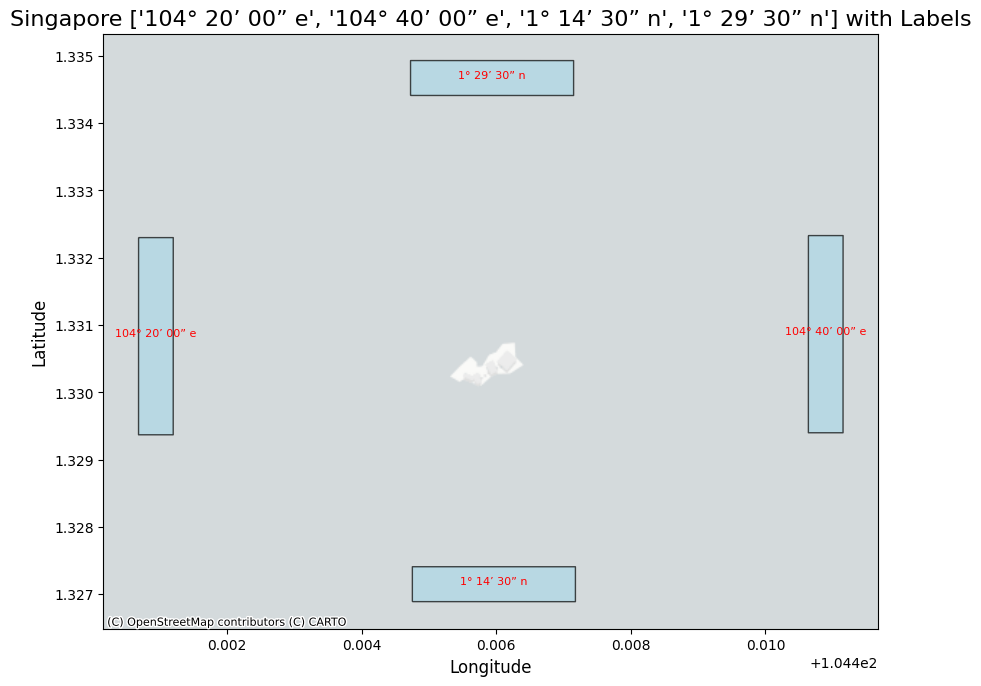

In [23]:
plot_features(gdf, ["104° 20’ 00” e", "104° 40’ 00” e", "1° 14’ 30” n", "1° 29’ 30” n"])

name                                        description  \
497              linkway  <center><table><tr><th colspan='2' align='cent...   
536              linkway  <center><table><tr><th colspan='2' align='cent...   
537              linkway  <center><table><tr><th colspan='2' align='cent...   
540              linkway  <center><table><tr><th colspan='2' align='cent...   
541              linkway  <center><table><tr><th colspan='2' align='cent...   
572              linkway  <center><table><tr><th colspan='2' align='cent...   
573              linkway  <center><table><tr><th colspan='2' align='cent...   
574      linkway (johor)  <center><table><tr><th colspan='2' align='cent...   
579  linkway (singapore)  <center><table><tr><th colspan='2' align='cent...   
583              linkway  <center><table><tr><th colspan='2' align='cent...   
584              linkway  <center><table><tr><th colspan='2' align='cent...   
585              linkway  <center><table><tr><th colspan='2' align='cent...   
587              linkway  <center><table><tr><th colspan='2' align='cent...   
588              linkway  <center><table><tr><th colspan='2' align='cent...   
589              linkway  <center><table><tr><th colspan='2' align='cent...   
590              linkway  <center><table><tr><th colspan='2' align='cent...   
607              linkway  <center><table><tr><th colspan='2' align='cent...   
608              linkway  <center><table><tr><th colspan='2' align='cent...   
609              linkway  <center><table><tr><th colspan='2' align='cent...   
610              linkway  <center><table><tr><th colspan='2' align='cent...   
611              linkway  <center><table><tr><th colspan='2' align='cent...   
612              linkway  <center><table><tr><th colspan='2' align='cent...   
613              linkway  <center><table><tr><th colspan='2' align='cent...   
615              linkway  <center><table><tr><th colspan='2' align='cent...   
616              linkway  <center><table><tr><th colspan='2' align='cent...   
617              linkway  <center><table><tr><th colspan='2' align='cent...   

                                              geometry  \
497  POLYGON Z ((103.71083 1.30845 0, 103.71125 1.3...   
536  POLYGON Z ((103.69816 1.30862 0, 103.69829 1.3...   
537  POLYGON Z ((103.81507 1.26441 0, 103.81498 1.2...   
540  POLYGON Z ((103.76486 1.23007 0, 103.76499 1.2...   
541  POLYGON Z ((103.76033 1.23329 0, 103.76043 1.2...   
572  POLYGON Z ((103.71192 1.29961 0, 103.71186 1.2...   
573  POLYGON Z ((103.82368 1.2629 0, 103.82413 1.26...   
574  POLYGON Z ((103.6333 1.35081 0, 103.63312 1.35...   
579  POLYGON Z ((103.63312 1.35046 0, 103.6333 1.35...   
583  POLYGON Z ((103.86733 1.42472 0, 103.86732 1.4...   
584  POLYGON Z ((103.88623 1.4231 0, 103.88626 1.42...   
585  POLYGON Z ((103.91412 1.41635 0, 103.91503 1.4...   
587  POLYGON Z ((103.92946 1.4015 0, 103.92998 1.40...   
588  POLYGON Z ((103.89581 1.41484 0, 103.89588 1.4...   
589  POLYGON Z ((103.69521 1.30766 0, 103.69532 1.3...   
590  POLYGON Z ((103.76709 1.22997 0, 103.76718 1.2...   
607  POLYGON Z ((103.82325 1.26306 0, 103.82355 1.2...   
608  POLYGON Z ((103.97613 1.31692 0, 103.97612 1.3...   
609  POLYGON Z ((103.87146 1.28043 0, 103.87126 1.2...   
610  POLYGON Z ((103.86453 1.29362 0, 103.86447 1.2...   
611  POLYGON Z ((103.86067 1.28804 0, 103.86067 1.2...   
612  POLYGON Z ((103.86112 1.28631 0, 103.86128 1.2...   
613  POLYGON Z ((103.85414 1.2869 0, 103.85374 1.28...   
615  POLYGON Z ((103.86031 1.28649 0, 103.86033 1.2...   
616  POLYGON Z ((103.89285 1.41512 0, 103.89329 1.4...   
617  POLYGON Z ((103.85439 1.28825 0, 103.8544 1.28...   

                 folder_path  
497  layers/coastal_outlines  
536  layers/coastal_outlines  
537  layers/coastal_outlines  
540  layers/coastal_outlines  
541  layers/coastal_outlines  
572  layers/coastal_outlines  
573  layers/coastal_outlines  
574  layers/coastal_outlines  
579  layers/coastal_outlines  
583  laye

C:\Users\meiro\AppData\Local\Temp\ipykernel_20752\3643948216.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf["name"]):


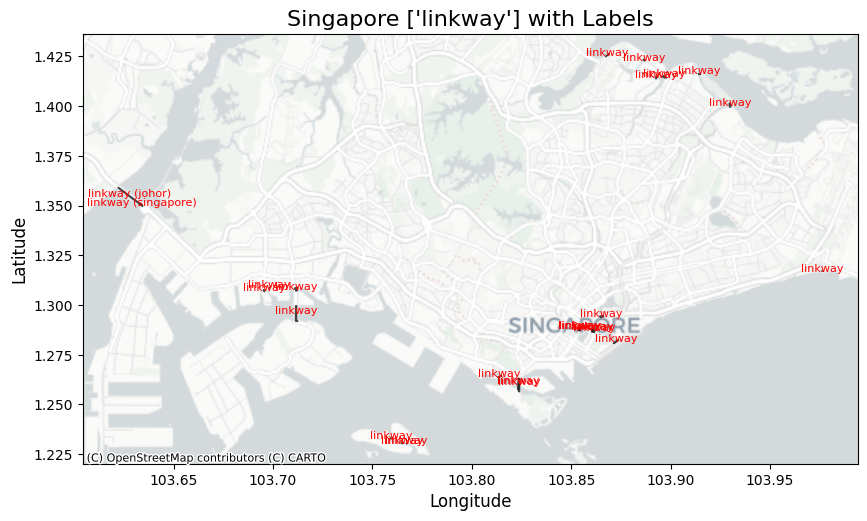

In [24]:
plot_features(gdf, ["linkway"])

name  \
423  bishan - ang mo kio park   
424  bishan - ang mo kio park   
425  bishan - ang mo kio park   

                                           description  \
423  <center><table><tr><th colspan='2' align='cent...   
424  <center><table><tr><th colspan='2' align='cent...   
425  <center><table><tr><th colspan='2' align='cent...   

                                              geometry  \
423  POLYGON Z ((103.84852 1.36293 0, 103.84853 1.3...   
424  POLYGON Z ((103.83368 1.36707 0, 103.83387 1.3...   
425  POLYGON Z ((103.84601 1.36059 0, 103.84595 1.3...   

                     folder_path  
423  layers/parks_naturalreserve  
424  layers/parks_naturalreserve  
425  layers/parks_naturalreserve

C:\Users\meiro\AppData\Local\Temp\ipykernel_20752\3643948216.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf["name"]):


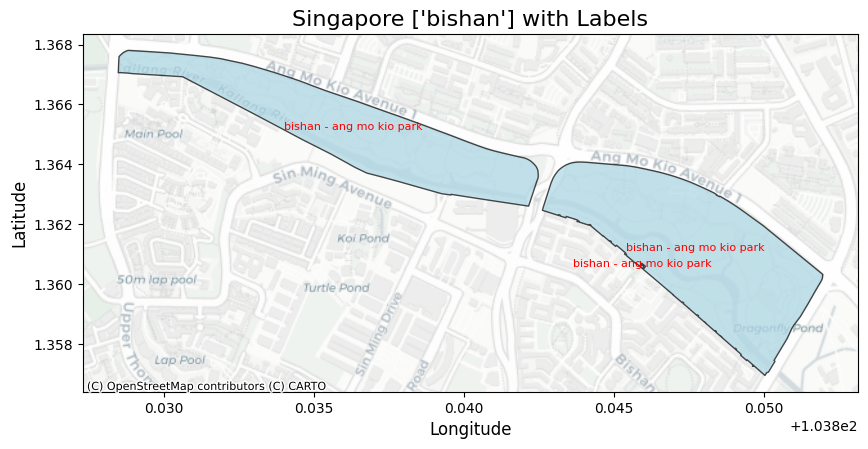

In [25]:
plot_features(gdf, ["bishan"])